# COVID-19-Autoencoder
We use Autoencoder in Keras to reduce data of COVID-19 patients
For more information please read the [data documentation](https://www.kaggle.com/datasets/hemanthhari/symptoms-and-covid-presence).

# 0. Preparation

In this part, you will use a dataset related to COVID-19. Load your dataset using pandas.

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
covid_data = pd.read_csv('Covid Dataset.csv')
categorical_feature_mask = covid_data.dtypes == object
cateforical_cols = covid_data.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
covid_data[cateforical_cols] = covid_data[cateforical_cols].apply(lambda col: le.fit_transform(col))
covid_data = covid_data.astype(float)

# Extract X and Y from the dataset
X_total = covid_data.iloc[:, 0:20].values
y_total = covid_data.iloc[:,20].values


#SPLIT THE DATA INTO TRAIN AND TEST DATA 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size = 0.3, random_state = 0)
X_train.shape
y_train.shape

(3803,)

---------------

# 1. DNN as nonlinear dimensionality reduction method

Autoencoder is an unsupervised artificial neural network that compresses the data to lower dimension and then reconstructs the input back. Autoencoder finds the representation of the data in a lower dimension by focusing more on the important features getting rid of noise and redundancy. It's based on Encoder-Decoder architecture, where encoder encodes the high-dimensional data to lower-dimension and decoder takes the lower-dimensional data and tries to reconstruct the original high-dimensional data.

![picture](https://drive.google.com/uc?id=1RTZwx4xL6zFV_nUENBgWlFKLKldPoyI-)

In the above Diagram, X is the input data, z is the lower-dimension representation of input X and X’ is the reconstructed input data. The mapping of higher to lower dimensions can be linear or non-linear depending on the choice of the activation function.

In this part you're gonna implement an autoencoder using Keras framework as dimensionally reduction module as explained [here](https://blog.keras.io/building-autoencoders-in-keras.html).
(It would be ok to use PyTorch as well.)
Reduce the dimension of the data to 2 dimensions and visualize the low-dimensional data.

In [40]:
# import necessary libraries
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [53]:
# define layers 

autoEncoder = Sequential()
autoEncoder.add(Dense(20,  activation='elu', input_shape=(20,)))
autoEncoder.add(Dense(10,  activation='elu'))
autoEncoder.add(Dense(2,    activation='linear', name="bottleneck"))
autoEncoder.add(Dense(10,  activation='elu',name="dense10after"))
autoEncoder.add(Dense(20,  activation='sigmoid'))
autoEncoder.compile(loss='mean_squared_error', optimizer = Adam())


In [58]:
# train the model and reduce the dimension of the data 

autoEncoder.fit(X_train,X_train,batch_size=128,epochs=20,verbose=1,validation_data = (X_test, X_test))
encoder=Model(autoEncoder.input,autoEncoder.get_layer('bottleneck').output)
data_encoded=encoder.predict(X_total)
data_decoded=autoEncoder.predict(X_test)



Epoch 1/20
30/30 [==============================] - 0s 3ms/step - loss: 0.3360 - val_loss: 0.3208
Epoch 2/20
30/30 [==============================] - 0s 2ms/step - loss: 0.2870 - val_loss: 0.2484
Epoch 3/20
30/30 [==============================] - 0s 2ms/step - loss: 0.2218 - val_loss: 0.2050
Epoch 4/20
30/30 [==============================] - 0s 2ms/step - loss: 0.1946 - val_loss: 0.1895
Epoch 5/20
30/30 [==============================] - 0s 2ms/step - loss: 0.1859 - val_loss: 0.1845
Epoch 6/20
30/30 [==============================] - 0s 2ms/step - loss: 0.1821 - val_loss: 0.1817
Epoch 7/20
30/30 [==============================] - 0s 1ms/step - loss: 0.1798 - val_loss: 0.1800
Epoch 8/20
30/30 [==============================] - 0s 2ms/step - loss: 0.1783 - val_loss: 0.1787
Epoch 9/20
30/30 [==============================] - 0s 2ms/step - loss: 0.1771 - val_loss: 0.1778
Epoch 10/20
30/30 [==============================] - 0s 2ms/step - loss: 0.1762 - val_loss: 0.1770
Epoch 11/20
30/30 [

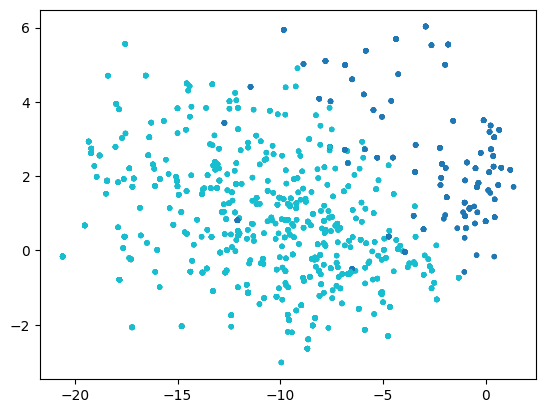

<Figure size 640x480 with 0 Axes>

In [59]:
# Plot the encoded data
plt.scatter(data_encoded[:,0], data_encoded[:,1], c=y_total[:], s=8, cmap='tab10')
plt.show()
plt.tight_layout()